In [25]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time

In [26]:
# portfolio of sector ETFs and their names
ticker_sector_map = {
    "XLC": "Communication Services",
    "XLY": "Consumer Discretionary",
    "XLP": "Consumer Staples",
    "XLE": "Energy",
    "XLF": "Financials",
    "XLV": "Health Care",
    "XLI": "Industrials",
    "XLB": "Materials",
    "XLRE": "Real Estate",
    "XLK": "Technology",
    "XLU": "Utilities",
}

tickers = list(ticker_sector_map.keys())
sector_labels = {ticker: f"{ticker} - {name}" for ticker, name in ticker_sector_map.items()}

In [27]:
start_date = "2020-01-01"
end_date = dt.datetime.now().strftime("%Y-%m-%d")

# # Download historical data from yf API
# data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# # download data to csv, filename have tickers joined by underscore and end_date
# data.to_csv("_".join(tickers) + "_" + end_date + ".csv")

In [28]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("_".join(tickers) + "_" + end_date + ".csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Forward fill missing values for each column
df = df.fillna(method='ffill')

# Convert all values to float
df = df.astype(float)

# set index as datetime
df.index = pd.to_datetime(df.index)

# keep only level 1 'Close' prices
df = df.xs('Close', level=1, axis=1)

# use descriptive names in charts/legends
df = df.rename(columns=sector_labels)

# # rename tickers to more readable names
# df.columns = pd.MultiIndex.from_tuples([
#     (
#         col[0].replace('XLC', 'Communication Services')
#                .replace('XLY', 'Consumer Discretionary')
#                .replace('XLP', 'Consumer Staples')
#                .replace('XLE', 'Energy')
#                .replace('XLF', 'Financials')
#                .replace('XLV', 'Health Care')
#                .replace('XLI', 'Industrials')
#                .replace('XLB', 'Materials')
#                .replace('XLRE', 'Real Estate')
#                .replace('XLK', 'Technology')
#                .replace('XLU', 'Utilities'),
#         col[1]
#     ) for col in df.columns
# ])

# df.head()

In [29]:
# df already contains Close prices from the previous cell
close_prices = df.copy()

# date index to datetime (already done, but ensuring consistency)
close_prices.index = pd.to_datetime(close_prices.index)

# Show the result
close_prices.head()

Ticker,XLP - Consumer Staples,XLC - Communication Services,XLE - Energy,XLF - Financials,XLRE - Real Estate,XLV - Health Care,XLY - Consumer Discretionary,XLB - Materials,XLU - Utilities,XLK - Technology,XLI - Industrials
Date,,,,,,,,,,,
2020-01-02,53.288204,51.215023,23.508690,27.785069,31.223099,92.685562,60.276024,26.884279,26.448549,44.349262,75.361710
2020-01-03,53.202908,50.884663,23.438837,27.490057,31.451839,91.877869,59.763084,26.450237,26.502432,43.850624,75.216438
2020-01-06,53.313786,51.564255,23.621227,27.472174,31.460012,92.449608,59.929321,26.335081,26.527302,43.955097,75.243683
2020-01-07,52.904408,51.630337,23.559132,27.293375,31.116896,92.268082,59.834324,26.304079,26.489998,43.936096,75.089348
2020-01-08,53.100559,51.998447,23.171076,27.472174,31.272116,92.867073,60.014809,26.397085,26.477564,44.406242,75.343544


In [30]:
# sectors ratios list against XLK - Technology
ratios_list = ['XLP/XLK', 'XLC/XLK', 'XLE/XLK', 'XLF/XLK', 'XLRE/XLK', 'XLV/XLK',
               'XLY/XLK', 'XLB/XLK', 'XLU/XLK', 'XLI/XLK']

In [31]:
# create ratios DataFrame
ratios_df = pd.DataFrame(index=close_prices.index)

# Calculate the price ratios for each pair in the ratios list
for pair in ratios_list:
    base, quote = pair.split('/')
    # Use the sector_labels to get the full column names
    base_col = sector_labels[base]
    quote_col = sector_labels[quote]
    ratios_df[pair] = close_prices[base_col] / close_prices[quote_col]

ratios_df = ratios_df.fillna(0)

# Show the result
ratios_df.tail()

,XLP/XLK,XLC/XLK,XLE/XLK,XLF/XLK,XLRE/XLK,XLV/XLK,XLY/XLK,XLB/XLK,XLU/XLK,XLI/XLK
Date,,,,,,,,,,
2025-12-18,0.555877,0.821466,0.309618,0.384573,0.283334,1.084427,0.863948,0.317975,0.303264,1.089700
2025-12-19,0.541297,0.804427,0.303066,0.378505,0.276311,1.068582,0.842278,0.312624,0.293065,1.075820
2025-12-22,0.536511,0.803665,0.304560,0.381097,0.276867,1.069854,0.842794,0.314618,0.292574,1.081910
2025-12-23,0.531072,0.804317,0.304899,0.379788,0.275300,1.061939,0.837067,0.313464,0.292018,1.075642
2025-12-24,0.533971,0.807177,0.303281,0.380930,0.276418,1.064935,0.837936,0.313329,0.292618,1.076555


In [32]:
# plot ratios for each pair in the ratios list using subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calculate number of rows and columns for subplots
n_ratios = len(ratios_list)
n_cols = 3  # 3 columns
n_rows = (n_ratios + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig = make_subplots(
    rows=n_rows, 
    cols=n_cols,
    subplot_titles=[f'{ratio}' for ratio in ratios_list],
    vertical_spacing=0.08,
    horizontal_spacing=0.05
)

# Add each ratio as a separate subplot
for i, ratio in enumerate(ratios_list):
    row = (i // n_cols) + 1
    col = (i % n_cols) + 1
    
    fig.add_trace(
        go.Scatter(
            x=ratios_df.index,
            y=ratios_df[ratio],
            mode='lines',
            name=ratio,
            line=dict(width=2),
            showlegend=False
        ),
        row=row, col=col
    )
    
    # Update y-axis title for each subplot
    fig.update_yaxes(title_text="Ratio", row=row, col=col)
    fig.update_xaxes(title_text="Date", row=row, col=col)

# Update layout
fig.update_layout(
    title_text="Sector Ratios - Individual Analysis",
    title_x=0.5,
    height=300 * n_rows,  # Adjust height based on number of rows
    showlegend=False
)

fig.show()

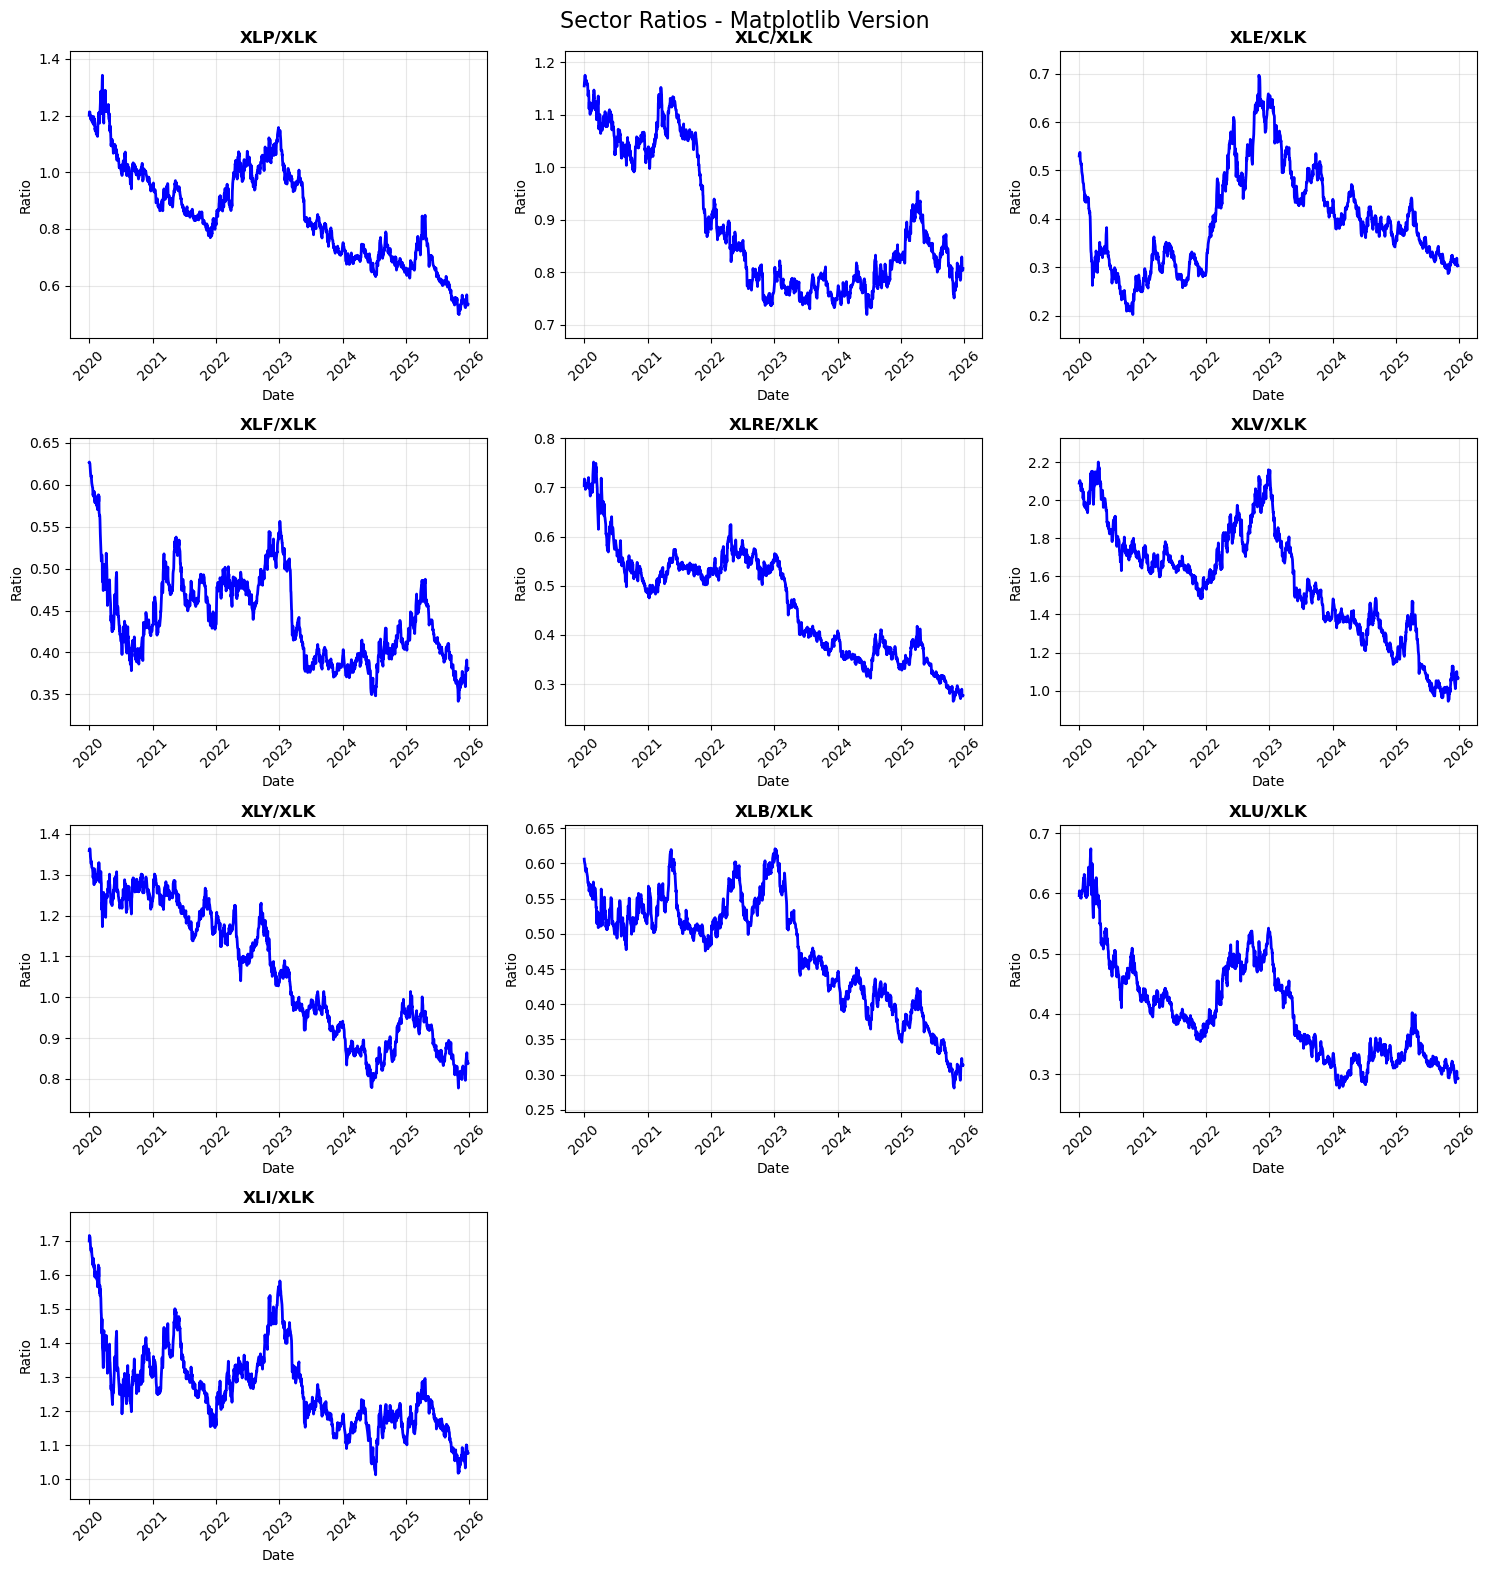


Sector Ratios Summary Statistics:
   XLP/XLK (Consumer Staples / Technology):
           Mean=0.8590, Std=0.1720, Min=0.4981, Max=1.3425
   XLC/XLK (Communication Services / Technology):
           Mean=0.8912, Std=0.1295, Min=0.7198, Max=1.1751
   XLE/XLK (Energy / Technology):
           Mean=0.3956, Std=0.1031, Min=0.2026, Max=0.6966
   XLF/XLK (Financials / Technology):
           Mean=0.4410, Std=0.0530, Min=0.3419, Max=0.6269
  XLRE/XLK (Real Estate / Technology):
           Mean=0.4664, Std=0.1089, Min=0.2648, Max=0.7518
   XLV/XLK (Health Care / Technology):
           Mean=1.5740, Std=0.2973, Min=0.9442, Max=2.2007
   XLY/XLK (Consumer Discretionary / Technology):
           Mean=1.0605, Std=0.1614, Min=0.7778, Max=1.3634
   XLB/XLK (Materials / Technology):
           Mean=0.4770, Std=0.0803, Min=0.2810, Max=0.6209
   XLU/XLK (Utilities / Technology):
           Mean=0.4039, Std=0.0840, Min=0.2768, Max=0.6742
   XLI/XLK (Industrials / Technology):
           Mean=1.2667, Std

In [33]:
# Alternative matplotlib visualization of sectors ratios

# Create subplots using matplotlib
n_ratios = len(ratios_list)
n_cols = 3
n_rows = (n_ratios + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
fig.suptitle('Sector Ratios - Matplotlib Version', fontsize=16, y=0.98)

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

# Plot each ratio
for i, ratio in enumerate(ratios_list):
    if i < len(axes):
        axes[i].plot(ratios_df.index, ratios_df[ratio], linewidth=2, color='blue')
        axes[i].set_title(f'{ratio}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Ratio')
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Remove zero values from y-axis display for better scaling
        non_zero_data = ratios_df[ratio][ratios_df[ratio] > 0]
        if not non_zero_data.empty:
            y_min, y_max = non_zero_data.min(), non_zero_data.max()
            margin = (y_max - y_min) * 0.1
            axes[i].set_ylim(max(0, y_min - margin), y_max + margin)

# Hide any unused subplots
for i in range(len(ratios_list), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Summary statistics
print("\nSector Ratios Summary Statistics:")
print("=" * 70)
for ratio in ratios_list:
    base, quote = ratio.split('/')
    base_name = ticker_sector_map[base]
    quote_name = ticker_sector_map[quote]
    non_zero_data = ratios_df[ratio][ratios_df[ratio] > 0]
    if not non_zero_data.empty:
        print(f"{ratio:>10} ({base_name} / {quote_name}):")
        print(f"           Mean={non_zero_data.mean():.4f}, "
              f"Std={non_zero_data.std():.4f}, "
              f"Min={non_zero_data.min():.4f}, "
              f"Max={non_zero_data.max():.4f}")
    else:
        print(f"{ratio:>10} ({base_name} / {quote_name}): No valid data available")